In [1]:
import os
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPRegressor
from sklearn import metrics

datapath = "/Users/adil/Documents/INTRO TO AI COURSEWORK/Clean_Dataset.csv"
# this will read the dataset as a dataframe i.e. flight is the dataframe 
flight = pd.read_csv(datapath)

flight.head()

print(flight)

        Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           

In [2]:
# FAIZA:
#Checking for null values in airline
flight['airline'].isnull().sum()

#Checking for null values in source city
flight['source_city'].isnull().sum()

#Checking for null values in departure time
flight['departure_time'].isnull().sum()

#Checking for null values in stops
flight['stops'].isnull().sum()

#Checking for null values in arrival_time
flight['arrival_time'].isnull().sum()

#Checking for null values in destination city
flight['destination_city'].isnull().sum()

#Checking for null values in class
flight['class'].isnull().sum()

#Checking for null values in duration
flight['duration'].isnull().sum()
 
#Checking for null values in days left
flight['days_left'].isnull().sum()

#Checking for null values in price
flight['price'].isnull().sum()

#Checking overall and asking for sum of null values
flight.isnull().values.all().sum()

# Dropping Flight column. Not in perceptron as not in that column. 
flight.drop('flight', 1, inplace=True)

# Changing price to Pounds
flight["price"] = (flight["price"]*0.011).round(2)

print(flight)

        Unnamed: 0   airline source_city departure_time stops   arrival_time  \
0                0  SpiceJet       Delhi        Evening  zero          Night   
1                1  SpiceJet       Delhi  Early_Morning  zero        Morning   
2                2   AirAsia       Delhi  Early_Morning  zero  Early_Morning   
3                3   Vistara       Delhi        Morning  zero      Afternoon   
4                4   Vistara       Delhi        Morning  zero        Morning   
...            ...       ...         ...            ...   ...            ...   
300148      300148   Vistara     Chennai        Morning   one        Evening   
300149      300149   Vistara     Chennai      Afternoon   one          Night   
300150      300150   Vistara     Chennai  Early_Morning   one          Night   
300151      300151   Vistara     Chennai  Early_Morning   one        Evening   
300152      300152   Vistara     Chennai        Morning   one        Evening   

       destination_city     class  dura

/var/folders/vb/3st2qktx4zx_kdrh74zrrl8r0000gn/T/ipykernel_54469/3048691129.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flight.drop('flight', 1, inplace=True)


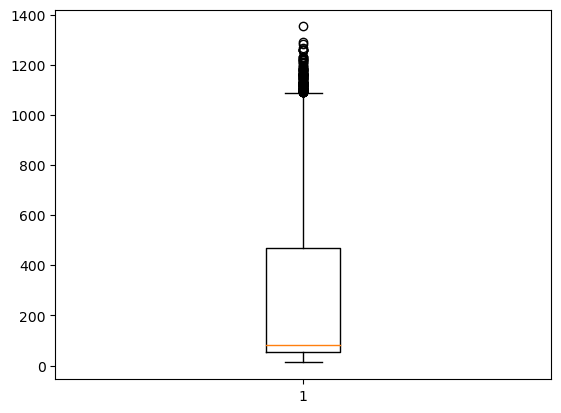

Unnamed: 0          False
airline             False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool


In [3]:
# VALLI:
# Feature Engineering: removing outliers & adding new logged price column
plt.boxplot(flight['price'])
plt.show()

print(flight.isnull().any())

In [4]:
# Creates a new column in the dataframe named 'price outlier'
flight['price_outlier'] = 0

#to find the mean and standard deviation of the price values to work out the outlier
price_mean = np.mean(flight['price'])
print(price_mean)
price_std = np.std(flight['price'])
print(price_std)

#calculation to assign 0 or 1 to the price values (0 if the datapoint is not an outlier & 1 if it is)
flight.loc[abs(flight['price'] - price_mean) > 2 * price_std,'price_outlier'] = 1

#This counts the number of unique outlier values
print(Counter(flight['price_outlier']))

flight = flight[flight.price_outlier != 1]
print (flight.shape) 

# Dropping 'price outlier' column
flight.drop('price_outlier', 1, inplace=True)

229.7860992894353
249.67505500334724
Counter({0: 289222, 1: 10931})
(289222, 12)


/var/folders/vb/3st2qktx4zx_kdrh74zrrl8r0000gn/T/ipykernel_54469/951093724.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flight.drop('price_outlier', 1, inplace=True)


In [5]:
# AAKASH:
le = LabelEncoder()

flight['airline'] = le.fit_transform(flight['airline'])
flight['source_city'] = le.fit_transform(flight['source_city'])
flight['departure_time'] = le.fit_transform(flight['departure_time'])
flight['arrival_time'] = le.fit_transform(flight['arrival_time'])
flight['destination_city'] = le.fit_transform(flight['destination_city'])
flight['class'] = le.fit_transform(flight['class'])



# Find unique values within the stops column
print(list(set(flight['stops'])))

# Match and replace the numerical values in text with integers
flight['stops'] = flight['stops'].replace(["zero", "one", "two_or_more"], [0, 1, 2])

print(flight.head())

['zero', 'two_or_more', 'one']
   Unnamed: 0  airline  source_city  departure_time  stops  arrival_time  \
0           0        4            2               2      0             5   
1           1        4            2               1      0             4   
2           2        0            2               1      0             1   
3           3        5            2               4      0             0   
4           4        5            2               4      0             4   

   destination_city  class  duration  days_left  price  
0                 5      1      2.17          1  65.48  
1                 5      1      2.33          1  65.48  
2                 5      1      2.17          1  65.52  
3                 5      1      2.25          1  65.50  
4                 5      1      2.33          1  65.50  


In [6]:
result = []


for x in flight.columns:
    if x != 'price':
        result.append(x)


X = flight[result].values
y = flight['price'].values

MLPpercep = MLPRegressor()

In [ ]:
#Use K fold 5 split

kf = KFold(5,shuffle=True)
fold = 1
for train_index, validate_index in kf.split(X,y):
    # ERROR BECAUSE OF LINE 128 (fixed because of the new X instead of just the dataframe  )
    MLPpercep.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = MLPpercep.predict(X[validate_index])

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    fold += 1

In [ ]:
plt.scatter(y_pred[:2000], y_test[:2000])
plt.title('MLP Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x = y_test, y = y_pred, scatter = False)

plt.show()